## Importation des librairies

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn') 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor  

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importation des données

In [3]:
df_ticket = pd.read_csv('data/ticket_data.csv')
df_cities = pd.read_csv('data/cities.csv')
df_stations = pd.read_csv('data/stations.csv')
df_providers = pd.read_csv('data/providers.csv')

## 1) Informations sur les données

### - Tickets

In [4]:
df_ticket.shape

(74168, 12)

In [5]:
df_ticket.sample(3)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
69237,6864261,8385,NaN,NaN,2017-10-20 15:30:00+00,2017-10-20 21:30:00+00,4050,2017-10-18 13:17:46.386+00,NaN,NaN,628,317
52166,6847191,8385,NaN,NaN,2017-10-22 18:30:00+00,2017-10-22 23:40:00+00,4050,2017-10-14 12:04:54.902+00,NaN,NaN,5520,628
35576,6830601,8385,NaN,NaN,2017-10-15 11:10:00+00,2017-10-15 14:50:00+00,2400,2017-10-10 07:30:10.809+00,NaN,NaN,562,126


Ce dataframe contient les informations sur les tickets de voyage telles que la station, la ville et l'heure où le voyageur a pris départ. Egalement nous retrouvons, la compagnie de transport qu'il a utilisé, les gares éventuelles où il est passé et d'autres compagnies qu'il a aussi potentiellement utilisé pour arriver à la station et ville de destination avec la précision de l'heure d'arrivée. Nous avons également dans les données le prix du ticket en cent et la date et l'heure de recherche de l'itinéraire. Enfin chaque donnée est identifiée de façon unique par un id.

In [6]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [7]:
df_ticket.isnull().sum()

id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

- Les attributs de temps n'ont pas le type adéquat, il faudra les transformer au préalable avant de pouvoir en tirer des informations utiles
- Plus de la moitié des tickets achetés ne présentent pas la mention des stations de départ et celles d'arrivée. 
- Il en est de même pour les stations intermédiaires.

### - Cities

In [8]:
df_cities.shape

(8040, 6)

In [9]:
df_cities.sample(3)

,id,local_name,unique_name,latitude,longitude,population
7078,10568,"Bar, Opština Bar, Црна Гора / Crna Gora",bar,42.097974,19.095453,NaN
126,1797,"Jimbolia, Timiș, România",jimbolia,45.791462,20.718092,NaN
6324,6852,"Herrlisheim, Grand-Est, France",herrlisheim,48.727800,7.910200,NaN


Nous retrouvons ici les informations sur les différentes villes convertes par les compagnies de transport. Chaque ville est identifiée de manière unique et est caractérisée par son nom local, son nom unique, ses coordonnées géographiques(latitude et longitude) ainsi que la taille de sa population.

In [10]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [11]:
df_cities.isnull().sum()

id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

- La dénominaion unique d'une seule ville est manquante. 
- Cependant peu de populations sont renseignées (4.6%)

In [12]:
df_cities.describe()

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


### - Stations

In [13]:
df_stations.shape

(11035, 4)

In [14]:
df_stations.sample(5)

,id,unique_name,latitude,longitude
10990,10992,Vittorio Veneto (via Giacomo Matteotti),45.972842,12.309498
9071,9072,Göschenen Ausserdorf Busbahnhof,46.668140,8.589570
7651,7652,Saulon,47.224200,5.104820
389,390,Gare de Zweibrücken,49.247358,7.357167
6938,6939,Pont-de-la-Deûle,50.398140,3.085080


Le dataframe df_stations décrit les différentes stations où chacune d'elle est identifiée de façon unique par un id. Ces dernières sont caractérisées par un nom unique et leur position géographique (latitude et longitude).

In [15]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


- Toutes les valeurs sont renseignées pour les stations

### - Providers

In [16]:
df_providers.shape

(227, 10)

In [17]:
df_providers.sample(5)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
164,178,9,517,madeltransEurolines,Madeltrans Eurolines,False,False,False,False,bus
178,192,9,545,globtour,Globtour,False,False,False,False,bus
44,53,9,213,brabusz,Brabusz,False,False,False,False,bus
49,58,9,223,europabusCazin,Europabus Cazin,False,False,False,False,bus
209,8371,20,I,isilines,Isilines,True,True,True,False,bus


Les providers sont des sous-compagnies comme mentionné dans l'énoncé. Chaque provider possède un identifiant qui lui est propre, l'identifiant de sa compagnie mère ainsi qu'un identifiant qui représente la combinaison d'une compagnie avec chacun de ses providers. Les providers ont des caractéristiques telles qu'un nom et un nom complet. Les informations sur la présence de wifi, de prises, de sièges ajustables à bord des véhicules sont disponibles. Egalement nous avons la mention d'une présence d'un service de vélo et celle du type du véhicule de transport.

In [18]:
df_providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


- Ici également presque toutes les données sur les providers sont remplies.
- Seules 3 observations présentent des valeurs manquantes sur la présence de wifi, de prise, de sièges ajustables ou de vélo.

## 2) Extraction des informations

### Prix minimum

In [19]:
df_ticket['price_in_cents'].min()

300

### Prix moyen 

In [20]:
df_ticket['price_in_cents'].mean()

4382.711061374178

### Prix maximum

In [21]:
df_ticket['price_in_cents'].max()

38550

- Ces informations sont aussi retrouvables directement avec la méthode describe. 
- La moyenne des prix des tickets est d'environ 44 euros, le ticket le moins cher étant à 3 euros et le moins élevé à environ 385 euros
- Regardons la distribution des données de cette colonne avec un boxplot et un histogramme.

<AxesSubplot:>

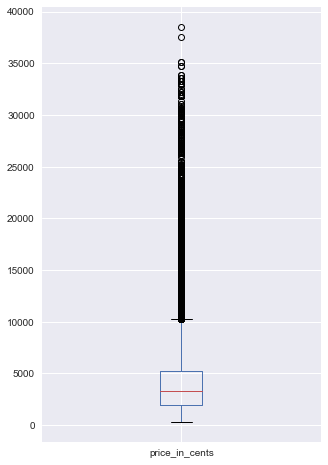

In [22]:
df_ticket.boxplot(figsize=(5,8),column=['price_in_cents'])

array([[<AxesSubplot:title={'center':'price_in_cents'}>]], dtype=object)

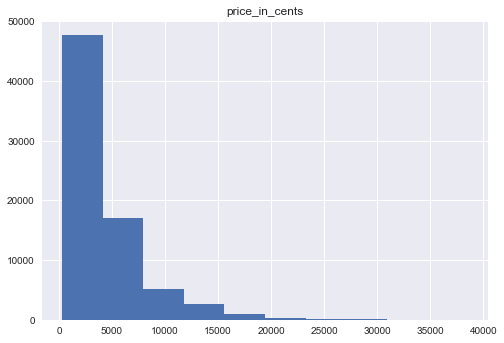

In [23]:
df_ticket.hist(column=['price_in_cents'])

- La grande variété au niveau des prix est encore plus visible ainsi que la présence d'un grand nombre d'outliers. Ces derniers faussent un peu la moyenne en la tirant vers une valeur plus haute

### Durée minimum par trajet

Comme nous l'avions précédemment anoncés, les données de type temps doivent être converties, après quoi nous pouvons faire la différence des temps d'arrivée et de départ sur toutes les données.

In [24]:
departure_converted = pd.to_datetime(df_ticket['departure_ts'])
arrival_converted   = pd.to_datetime(df_ticket['arrival_ts'])
duree = arrival_converted - departure_converted
duree

0       0 days 06:10:00
1       0 days 17:50:00
2       1 days 07:57:00
3       0 days 21:35:00
4       0 days 21:46:00
              ...      
74163   0 days 13:30:00
74164   0 days 06:30:00
74165   0 days 06:45:00
74166   0 days 07:45:00
74167   0 days 06:55:00
Length: 74168, dtype: timedelta64[ns]

In [25]:
duree_min = duree.min()
duree_min

Timedelta('0 days 00:20:00')

### Durée maximum par trajet

In [26]:
duree_max = duree.max()
duree_max

Timedelta('20 days 12:51:00')

### Durée moyenne par trajet

In [27]:
duree_mean = duree.mean()
duree_mean

Timedelta('0 days 07:04:37.247600043')

- Les temps de voyage peuvent varier de 20 mn à 20 jours, avec une moyenne d'environ 7 heures.
- Les temps et les prix des voyages dépendent naturellemnt du type de transport et de la distance à parcourir.

### - Différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 

#### Créons une table qui regroupe toutes les informations indispensables dont on a besoin 

In [28]:
new_ticket = df_ticket.drop(['o_station', 'd_station', 'search_ts', 'middle_stations','other_companies'], axis=1)
new_city   = df_cities.drop(['population'], axis=1)
# new_provider = df_providers.drop(['has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle'], axis=1)

- Nous avons dans un premier temps selectionné les variables dont on a besoin dans de nouveaux dataframes afin de faciliter la visualisation du dataframe final . Après quoi, nous faisons un merge en utilisant les attributs liant les différents dataframes(par exemple 'o_city' dans new_ticket et 'id' new_city)

In [29]:
df_merged = (pd.merge(new_ticket, new_city, left_on='o_city', right_on='id', how='inner', suffixes=('_ticket', '_city'))
        .merge(new_city, left_on='d_city', right_on='id', how='inner', suffixes=('_o', '_d'))
        .sort_index(axis=1)
        .drop(['id', 'd_city', 'id_city', 'o_city'], axis=1, errors='ignore')
        .merge(df_providers, left_on='company', right_on='id', how='inner')
        .drop(['company', 'id', 'company_id', 'provider_id'], axis=1, errors='ignore')
     )
df_merged.sample(3)

,arrival_ts,departure_ts,id_ticket,latitude_d,latitude_o,local_name_d,local_name_o,longitude_d,longitude_o,price_in_cents,unique_name_d,unique_name_o,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
43993,2017-11-10 22:25:00+00,2017-11-10 12:15:00+00,6822155,44.833570,48.847702,"Bordeaux, Nouvelle-Aquitaine, France","Paris, Île-de-France, France",-0.573845,2.352311,3400,bordeaux,paris,ouibus,Ouibus,True,True,True,False,bus
28486,2017-10-20 20:20:00+00,2017-10-20 19:10:00+00,6858626,43.613299,44.165376,"Toulouse, Occitanie, France","Agen, Nouvelle-Aquitaine, France",1.452226,0.606235,950,toulouse,agen,bbc,Blablacar,False,False,False,False,carpooling
22053,2017-10-15 21:10:00+00,2017-10-15 17:00:00+00,6845028,50.638756,48.650012,"Lille, Hauts-de-France, France","Nancy, Grand-Est, France",3.076675,6.145242,3250,lille,nancy,bbc,Blablacar,False,False,False,False,carpooling


#### - Création d'une colonne distance trajet qui contient la distance parcourue lors d'un voyage 

- Nous allons utiliser les coordonnées des villes puisque celles des stations comportent beaucoup de valeurs manquantes.
- La distance entre deux villes va se calculer en utilisant la formule de Haversine qui calcule la plus petite distance entre deux points sur une sphère.

In [30]:
from math import sin, cos, asin, radians, sqrt

def distance(origine, destination):
    '''Fonction de calcul de la distance entre deux zones géographiques'''
    # coordonnées des points de départ et d'arrivée
    latitude1, longitude1 = origine
    latitude2, longitude2 = destination
    # conversion des coordonnées en radian
    latitude1, longitude1, latitude2, longitude2 = map(radians, [latitude1, longitude1, latitude2, longitude2])
    # rayon de la terre
    rayon = 6371
    # difference des coordonées des deux points de départ, nécessaire à la formule de haversine
    distance_latitude  = latitude2-latitude1
    distance_longitude = longitude2-longitude1
    # formule de Haversine 
    h = sin(distance_latitude/2)**2 + cos(latitude1)*cos(latitude2)*(sin(distance_longitude/2))**2
    # distance entre les deux points en kilomètre
    dk = 2*rayon*asin(sqrt(h))
    return dk

In [31]:
def calcul_distance(row):  
    '''Fonction qui permet de créer une nouvelle colonne comportant 
       les distances calculées entre la ville de départ et celle d"arrivée
    '''
    val = distance((row['latitude_o'], row['longitude_o']), (row['latitude_d'], row['longitude_d']))
    return val

# application de la fonction au dataframe
df_merged['distance'] = df_merged.apply(calcul_distance, axis=1)

In [32]:
def category_distance(row):  
    ''' Fonction qui permet de créer une nouvelle colonne 
        regroupant les distances en fonction des catégories suivantes
          cat1 --> (0-200km)
          cat2 --> (200-800km)
          cat3 --> (800-2000km)
          cat4 --> (2000+km)
    '''
    if row['distance'] > 0 and row['distance'] <= 200:
        val = 'cat1' 
    elif row['distance'] > 200 and row['distance'] <= 800:
        val = 'cat2'
    elif row['distance'] > 800 and row['distance'] <= 2000:
        val = 'cat3' 
    elif row['distance'] > 2000:
        val = 'cat4'
    return val

# application de la fonction au dataframe
df_merged['category_distance'] = df_merged.apply(category_distance, axis=1)

In [33]:
# cette opération est la même que celle réalisée dans la première question
# nous faisons juste en sorte de stocker le résulat en secondes dans une 
# colonne pour faciliter les opérations ultérieures.

def calcul_temps(row):  
    '''Fonction qui permet de calculer le temps mis entre le départ et l'arrivée d'un voyage'''
    
    val = pd.to_datetime(row['arrival_ts']) - pd.to_datetime(row['departure_ts'])
    return val/np.timedelta64(1, 's')

# application de la fonction au dataframe
df_merged['duree_voyage'] = df_merged.apply(calcul_temps, axis=1)

In [34]:
df_merged.sample(3)

,arrival_ts,departure_ts,id_ticket,latitude_d,latitude_o,local_name_d,local_name_o,longitude_d,longitude_o,price_in_cents,...,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,distance,category_distance,duree_voyage
28711,2017-10-09 12:10:00+00,2017-10-09 09:30:00+00,6818967,43.613299,43.604452,"Toulouse, Occitanie, France","Montpellier, Occitanie, France",1.452226,3.918318,1800,...,bbc,Blablacar,False,False,False,False,carpooling,198.546025,cat1,9600.0
45805,2017-10-09 13:53:00+00,2017-10-09 09:43:00+00,6808987,49.443232,48.006110,"Rouen, Normandie, France","Le Mans, Pays-de-la-Loire, France",1.099971,0.199556,3990,...,corailintercite,Intercités,False,False,True,False,train,172.908722,cat1,15000.0
62320,2017-10-14 22:35:00+00,2017-10-14 18:29:00+00,6838091,43.547133,43.296482,"Cannes, Provence-Alpes-Côte d'Azur, France","Marseille, Provence-Alpes-Côte d'Azur, France",7.013264,5.369780,2240,...,train,TER,False,False,True,False,train,135.623755,cat1,14760.0


### Différence de prix moyen selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 

- Pour avoir les informations dont nous avons besoin nous allons d'abord : regrouper les données par type de transport et par categorie de distance et créer une nouvelle colonne comportant le prix moyen
- Cependant il serait mieux d'avoir les types de transport d'un côté et les catégories de l'autre pour une visualisation plus facile et agréable. Nous allons donc faire un pivot du dataframe pour avoir les types de transport en colonnes, les valeurs des prix moyens ou durées moyennes comme données et les catégories de distance comme index. 
- Le code entier est le suivant sous forme de fonction:

In [35]:
def indicateur_moyen(dataframe, indicateur_nom, indicateur_colonne):
    return (dataframe
              .groupby(['transport_type', 'category_distance'])
              .apply(lambda x: pd.Series({indicateur_nom: x[indicateur_colonne].mean()}))
              .pivot_table(
                    columns='transport_type',
                    values=indicateur_nom,
                    index=['category_distance'],
                ))

In [36]:
diff_prix = indicateur_moyen(df_merged, 'prix', 'price_in_cents')
diff_prix

transport_type,bus,carpooling,train
category_distance,,,
cat1,2182.830918,1177.352385,3487.900779
cat2,3494.850022,3218.064310,9124.779489
cat3,6949.950045,8626.545455,15463.746130


<AxesSubplot:xlabel='category_distance'>

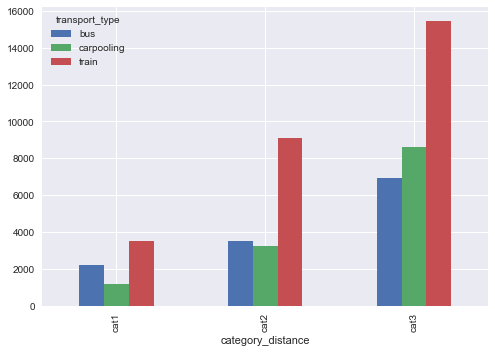

In [37]:
diff_prix.plot.bar()

- Nous pouvons constater que pour les trajets les plus courts(0-200km) et (201-800km), le covoiturage revient moins cher en moyenne suivi du bus.
- Pour les voyages de 800 à 2000km cependant, le bus est en moyenne l'option la moins chère suivie du covoiturage.
- Dans tous les cas, le train est toujours plus coûteux.

### Différence de durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 

In [38]:
diff_temps = indicateur_moyen(df_merged, 'duree', 'duree_voyage')
diff_temps

transport_type,bus,carpooling,train
category_distance,,,
cat1,36837.053140,7027.342428,15909.840098
cat2,54269.269315,17147.272436,27639.543515
cat3,99130.027248,47160.839161,43771.021672


<AxesSubplot:xlabel='category_distance'>

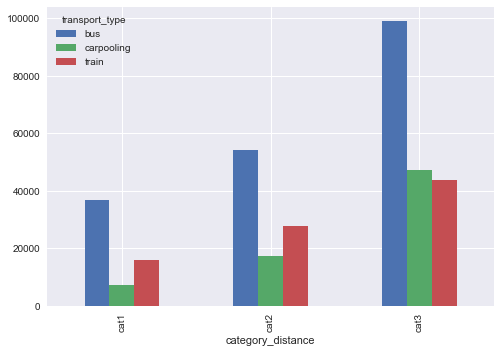

In [39]:
diff_temps.plot.bar()

- Concernant la durée moyenne des voyages, le covoiturage est le moyen le plus rapide en moyenne, suivi du train pour les distances de 0 à 200km et ceux de plus de 200 à 800km
- Pour les voyages plus longs de 800 à 2000km, le train est néanmoins plus rapide en général, suivi du covoiturage.
- Dans toutes les catégories de distance le bus prend plus de temps

In [40]:
def best_transport(dataframe, f_ind_moyen, ind_nom, ind_colonne, dist_cat):
    '''Fonction qui propose le meilleur type de transport selon l'indicateur 
       que l'utilisateur choisit (coût moyen ou durée moyenne du trajet) en 
       fonction de la catégorie de distance à parcourir 
    '''
    new_data = f_ind_moyen(dataframe, ind_nom, ind_colonne)
    new_data_cat = new_data.loc[dist_cat]
    best_trans = new_data_cat[new_data_cat == new_data_cat.min()].index
    message_s = 'Le meilleur type de transport pour la distance que vous avez à parcourir est le '
    message_p = 'Les meilleurs types de transport pour la distance que vous avez à parcourir sont '
    if len(best_trans) == 1:
        print(message_s)
    else : 
        print(message_p)
    for i in best_trans:
        print(i)

In [41]:
best_transport(df_merged, indicateur_moyen, 'duree', 'duree_voyage', 'cat3')

Le meilleur type de transport pour la distance que vous avez à parcourir est le 
train


In [42]:
best_transport(df_merged, indicateur_moyen, 'duree', 'duree_voyage', 'cat2')

Le meilleur type de transport pour la distance que vous avez à parcourir est le 
carpooling


In [43]:
df_merged.head(3)

,arrival_ts,departure_ts,id_ticket,latitude_d,latitude_o,local_name_d,local_name_o,longitude_d,longitude_o,price_in_cents,...,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,distance,category_distance,duree_voyage
0,2017-10-13 20:10:00+00,2017-10-13 14:00:00+00,6795025,43.604452,47.907018,"Montpellier, Occitanie, France","Orléans, Centre-Val de Loire, France",3.918318,1.906270,4550,...,bbc,Blablacar,False,False,False,False,carpooling,503.197167,cat2,22200.0
1,2017-10-06 15:00:00+00,2017-10-06 07:00:00+00,6797839,43.604452,48.847702,"Montpellier, Occitanie, France","Paris, Île-de-France, France",3.918318,2.352311,5800,...,bbc,Blablacar,False,False,False,False,carpooling,595.301747,cat2,28800.0
2,2017-10-06 16:20:00+00,2017-10-06 08:20:00+00,6797840,43.604452,48.847702,"Montpellier, Occitanie, France","Paris, Île-de-France, France",3.918318,2.352311,5450,...,bbc,Blablacar,False,False,False,False,carpooling,595.301747,cat2,28800.0


## Prediction du prix du billet en fonction des variables adéquates

In [44]:
df_merged['month_arrival'] = pd.to_datetime(df_merged['arrival_ts'], format = "%Y-%m-%d %H:%M:%S").dt.month
df_merged['day_arrival'] = pd.to_datetime(df_merged['arrival_ts'], format = "%Y-%m-%d %H:%M:%S").dt.day
df_merged['hour_arrival'] = pd.to_datetime(df_merged['arrival_ts'], format = "%Y-%m-%d %H:%M:%S").dt.hour
df_merged['mn_arrival'] = pd.to_datetime(df_merged['arrival_ts'], format = "%Y-%m-%d %H:%M:%S").dt.minute

In [45]:
df_merged['month_departure'] = pd.to_datetime(df_merged['departure_ts'], format = "%Y-%m-%d %H:%M:%S").dt.month
df_merged['day_departure'] = pd.to_datetime(df_merged['departure_ts'], format = "%Y-%m-%d %H:%M:%S").dt.day
df_merged['hour_departure'] = pd.to_datetime(df_merged['departure_ts'], format = "%Y-%m-%d %H:%M:%S").dt.hour
df_merged['mn_departure'] = pd.to_datetime(df_merged['departure_ts'], format = "%Y-%m-%d %H:%M:%S").dt.minute

In [47]:
data_predictions = df_merged.drop(['arrival_ts', 'departure_ts', 'id_ticket', 'latitude_d', 
                                   'latitude_o', 'local_name_d', 'local_name_o', 'longitude_d',
                                   'longitude_o', 'name', 'distance'], axis=1)

In [48]:
data_predictions.head(3)

,price_in_cents,unique_name_d,unique_name_o,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,category_distance,duree_voyage,month_arrival,day_arrival,hour_arrival,mn_arrival,month_departure,day_departure,hour_departure,mn_departure
0,4550,montpellier,orleans,Blablacar,False,False,False,False,carpooling,cat2,22200.0,10,13,20,10,10,13,14,0
1,5800,montpellier,paris,Blablacar,False,False,False,False,carpooling,cat2,28800.0,10,6,15,0,10,6,7,0
2,5450,montpellier,paris,Blablacar,False,False,False,False,carpooling,cat2,28800.0,10,6,16,20,10,6,8,20


## Nettoyage, Encodage

In [49]:
data_predictions.dropna(axis=0, inplace=True)

In [50]:
# conversion des valeurs booléennes en 0 et 1
def encodage(row, col):
    if row[col] == False: 
        val = 0
    else :
        val = 1        
    return val

In [51]:
# conversion des valeurs booléennes en 0 et 1
data_predictions['has_wifi'] = data_predictions.apply(encodage, col='has_wifi', axis=1)
data_predictions['has_plug'] = data_predictions.apply(encodage, col='has_plug', axis=1)
data_predictions['has_adjustable_seats'] = data_predictions.apply(encodage, col='has_adjustable_seats', axis=1)
data_predictions['has_bicycle'] = data_predictions.apply(encodage, col='has_bicycle', axis=1)
# encodage des variables catégorielles
uniq_name_d = pd.get_dummies(data_predictions['unique_name_d'], prefix = 'destination')
uniq_name_o = pd.get_dummies(data_predictions['unique_name_o'], prefix = 'origine')
company_name = pd.get_dummies(data_predictions['fullname'], prefix = 'company')
transport_type = pd.get_dummies(data_predictions['transport_type'], prefix = 'transport')
category_distance = pd.get_dummies(data_predictions['category_distance'], prefix = 'distance')
data_predictions.drop(['unique_name_d', 'unique_name_o', 'fullname', 'transport_type', 'category_distance'], axis=1,inplace=True)
# dataset final
new_data = pd.concat([data_predictions, uniq_name_d, uniq_name_o, company_name, transport_type, category_distance], axis = 1)
new_data.head(3)

,price_in_cents,has_wifi,has_plug,has_adjustable_seats,has_bicycle,duree_voyage,month_arrival,day_arrival,hour_arrival,mn_arrival,...,company_Student Agency,company_TER,company_TGV,company_Thalys,transport_bus,transport_carpooling,transport_train,distance_cat1,distance_cat2,distance_cat3
0,4550,0,0,0,0,22200.0,10,13,20,10,...,0,0,0,0,0,1,0,0,1,0
1,5800,0,0,0,0,28800.0,10,6,15,0,...,0,0,0,0,0,1,0,0,1,0
2,5450,0,0,0,0,28800.0,10,6,16,20,...,0,0,0,0,0,1,0,0,1,0


### Séparation des features et du target

In [52]:
X, y = new_data.drop('price_in_cents', axis=1), new_data['price_in_cents']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59321, 675)
(14831, 675)
(59321,)
(14831,)


### - Modèle de regression linéaire

### Entrainement du modèle

In [69]:
model_reg = LinearRegression().fit(X_train, y_train)

0.7279350084602989 0.7149612275143931


### Evaluation du modèle

In [76]:
R2 = model_reg.score(X_test, y_test)
n=len(y_test)
p=X_test.shape[1]
adj_R2 = 1-(1-R2)*((n-1)/(n-p-1))
print(R2, adj_R2)

0.7279350084602989 0.7149612275143931


- 71% du prix du voyage peut être expliqué par le modèle

In [87]:
y_pred_reg = model_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred_reg))
print(math.sqrt(mean_squared_error(y_test, y_pred_reg)))

3794666.9833953087
1947.9904987949271


### - Modèle de arbre de décision

In [83]:
model_tree = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)

In [85]:
R2 = model_tree.score(X_test, y_test)
n=len(y_test)
p=X_test.shape[1]
adj_R2 = 1-(1-R2)*((n-1)/(n-p-1))
print(R2, adj_R2)

0.9148572859960974 0.9107971424459289


- 91% du prix du voyage peut être expliqué par le modèle

In [88]:
y_pred_tree = model_tree.predict(X_test) 
print(mean_squared_error(y_test, y_pred_tree))
print(math.sqrt(mean_squared_error(y_test, y_pred_tree)))

1187540.682389237
1089.743402085664


- Le modèle de décision Tree a eu de meilleurs résultats et semble plus fiable. 